# Import libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns; sns.set()
import csv

import warnings
warnings.filterwarnings('ignore')

In [53]:
from sklearn.metrics.pairwise import haversine_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
from sklearn import feature_extraction
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [55]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import geodatasets
import contextily as ctx

# Import Dataset and config Dataset

In [56]:
df = pd.read_excel('armazens.xlsx')
df.shape

(18079, 19)

In [57]:
df.columns

Index(['UF', 'Município', 'Agente Armazenador', 'Espécie', 'CDA', 'Latitude',
       'Longitude', 'Endereço', 'Telefone Comercial', 'e-mail',
       'Presta Serviço', 'Certificação',
       'Habilitação para Armazenar Estoques Públicos',
       'Capacidade Estática (t)', 'Sociedade_anonima', 'Pessoa_fisica',
       'Cooperativa', 'CONAB', 'Filial'],
      dtype='object')

In [58]:
df.head(3)

,UF,Município,Agente Armazenador,Espécie,CDA,Latitude,Longitude,Endereço,Telefone Comercial,e-mail,Presta Serviço,Certificação,Habilitação para Armazenar Estoques Públicos,Capacidade Estática (t),Sociedade_anonima,Pessoa_fisica,Cooperativa,CONAB,Filial
0,AC,ACRELÂNDIA-AC,PESSOA FÍSICA,GRANEL SÓLIDO,35.F197.0001-0,-9.94550,-67.06000,BR 364 KM 90. SILO GRANELEIRO ZONA RURAL - 6...,NaN,NaN,NÃO,NÃO CERTIFICADO,NÃO CREDENCIADO,2660,Não,Sim,Não,Não,Não se aplica
1,AC,BRASILÉIA-AC,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,CONVENCIONAL,35.F671.0001-9,-10.98805,-68.76138,ROD. BR 317 KM 02 Nº. 1500 - ZONA RURAL FUNDOS...,(68) 99226,adriano26rodri@gmail.com,NÃO,NÃO CERTIFICADO,NÃO CREDENCIADO,530,Não,Não,Não,Não,Apenas 1
2,AC,BRASILÉIA-AC,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,CONVENCIONAL,35.F722.0001-8,-10.99583,-68.75527,AV. MANOEL MARINHO MONTE TRÊS BOTIQUINS - 69...,(68) 99206,armazemsantafeltda@gamil.com,NÃO,NÃO CERTIFICADO,NÃO CREDENCIADO,190,Não,Não,Não,Não,Apenas 1


In [59]:
df = df[['Agente Armazenador', 'Latitude', 'Longitude']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18079 entries, 0 to 18078
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Agente Armazenador  18079 non-null  object 
 1   Latitude            18079 non-null  float64
 2   Longitude           18079 non-null  float64
dtypes: float64(2), object(1)
memory usage: 423.9+ KB


In [60]:
df[df['Agente Armazenador'].isna()]

,Agente Armazenador,Latitude,Longitude


In [61]:
df1 = df.copy()

In [62]:
df1[df1.columns[1:3]]

,Latitude,Longitude
0,-9.945500,-67.060000
1,-10.988050,-68.761380
2,-10.995830,-68.755270
3,-10.995220,-68.754620
4,-10.988120,-68.761100
...,...,...
18074,-12.792001,-49.085311
18075,-12.792242,-49.085846
18076,-6.326620,-47.445910
18077,-6.326961,-47.445785


# Clustering K-MEANS

In [63]:
kmeans = KMeans(n_clusters = 15, init ='k-means++')
kmeans.fit(df1[df1.columns[1:3]]) # Compute k-means clustering.
df1['cluster_label'] = kmeans.fit_predict(df1[df1.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(df1[df1.columns[1:3]]) # Labels of each point
df1.head(10)

,Agente Armazenador,Latitude,Longitude,cluster_label
0,PESSOA FÍSICA,-9.94550,-67.06000,5
1,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,-10.98805,-68.76138,5
2,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,-10.99583,-68.75527,5
3,A.G.C. GUIMARÃES IMP. EXP.,-10.99522,-68.75462,5
4,L. L. SILVA TRANSPORTADORA LTDA,-10.98812,-68.76110,5
5,ACREAVES ALIMENTOS LTDA,-10.96339,-68.79859,5
6,PESSOA FÍSICA,-10.36930,-67.69338,5
7,PESSOA FÍSICA,-10.22082,-67.76933,5
8,AGROPECUÁRIA BURITI SA,-10.60357,-67.75298,5
9,AMAZONIA AGROINDUSTRIA LTDA,-7.36420,-72.42240,5


In [64]:
labels

array([5, 5, 5, ..., 7, 7, 1])

In [65]:
df1.groupby(['cluster_label'])['Agente Armazenador'].count()

cluster_label
0     1568
1      958
2     1323
3     1962
4     1659
5      269
6     1938
7      402
8      435
9     1542
10    1099
11    1086
12    1376
13     305
14    2157
Name: Agente Armazenador, dtype: int64

In [66]:
silhouette_score = metrics.silhouette_score(df1[df1.columns[1:3]], labels, metric='euclidean')
silhouette_score

0.41649979329539766

## Map 1 - Plot points with colors

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


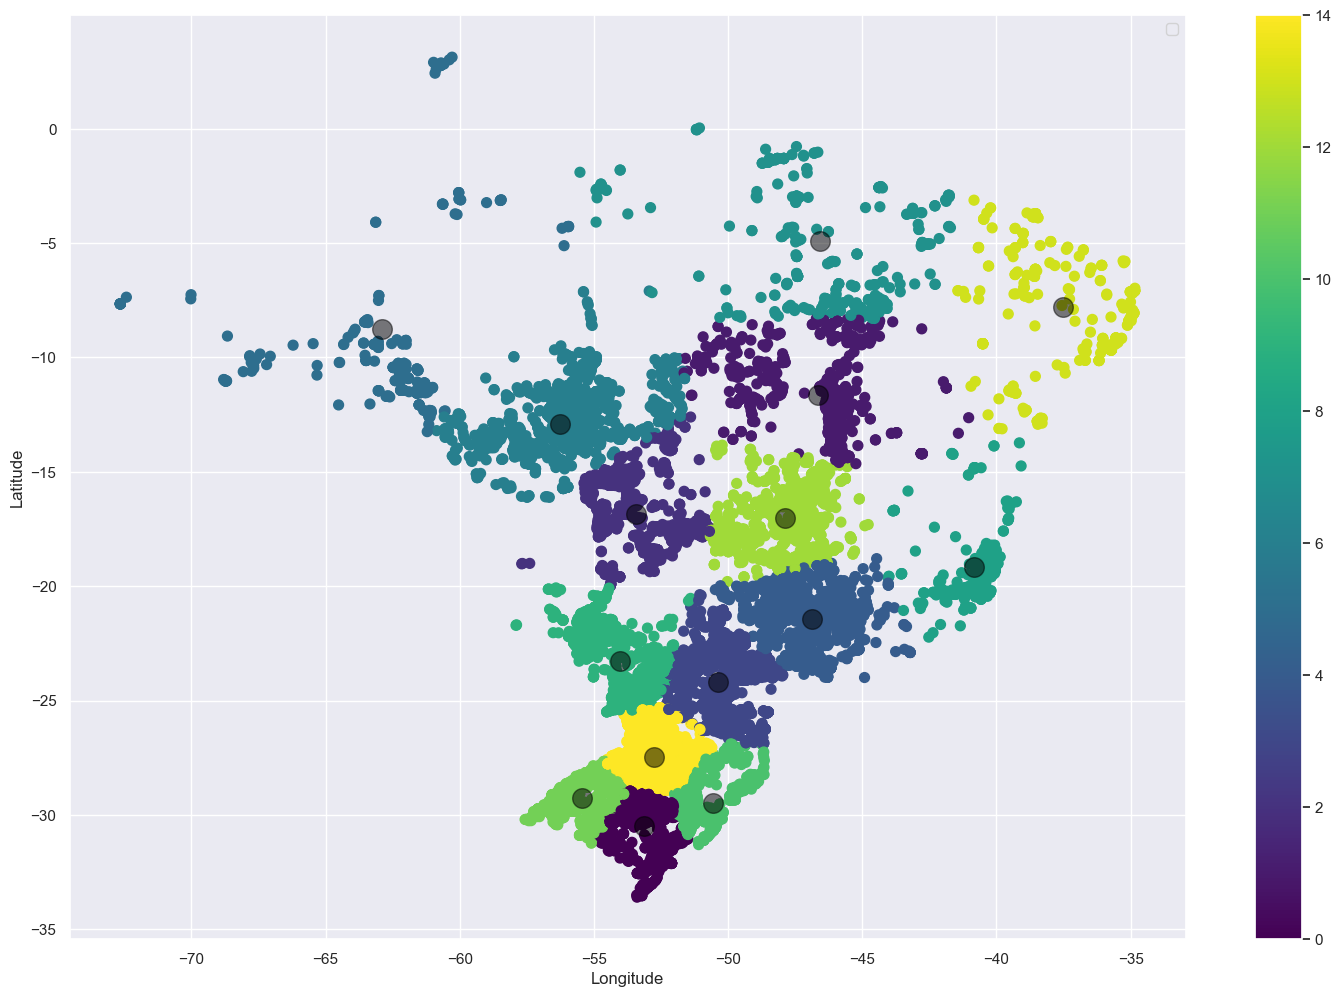

In [67]:
df1.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels, s=50, cmap='viridis', figsize=(18,12))
plt.scatter(centers[:, 1], centers[:, 0], c='black', s=200, alpha=0.5)
plt.legend()

## Map 2 - Plot points with colors and legend

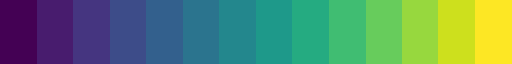

In [68]:
cmap = plt.cm.get_cmap("viridis",14)
cmap

In [69]:
unique_classes = list(set(df1['cluster_label']))
unique_classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

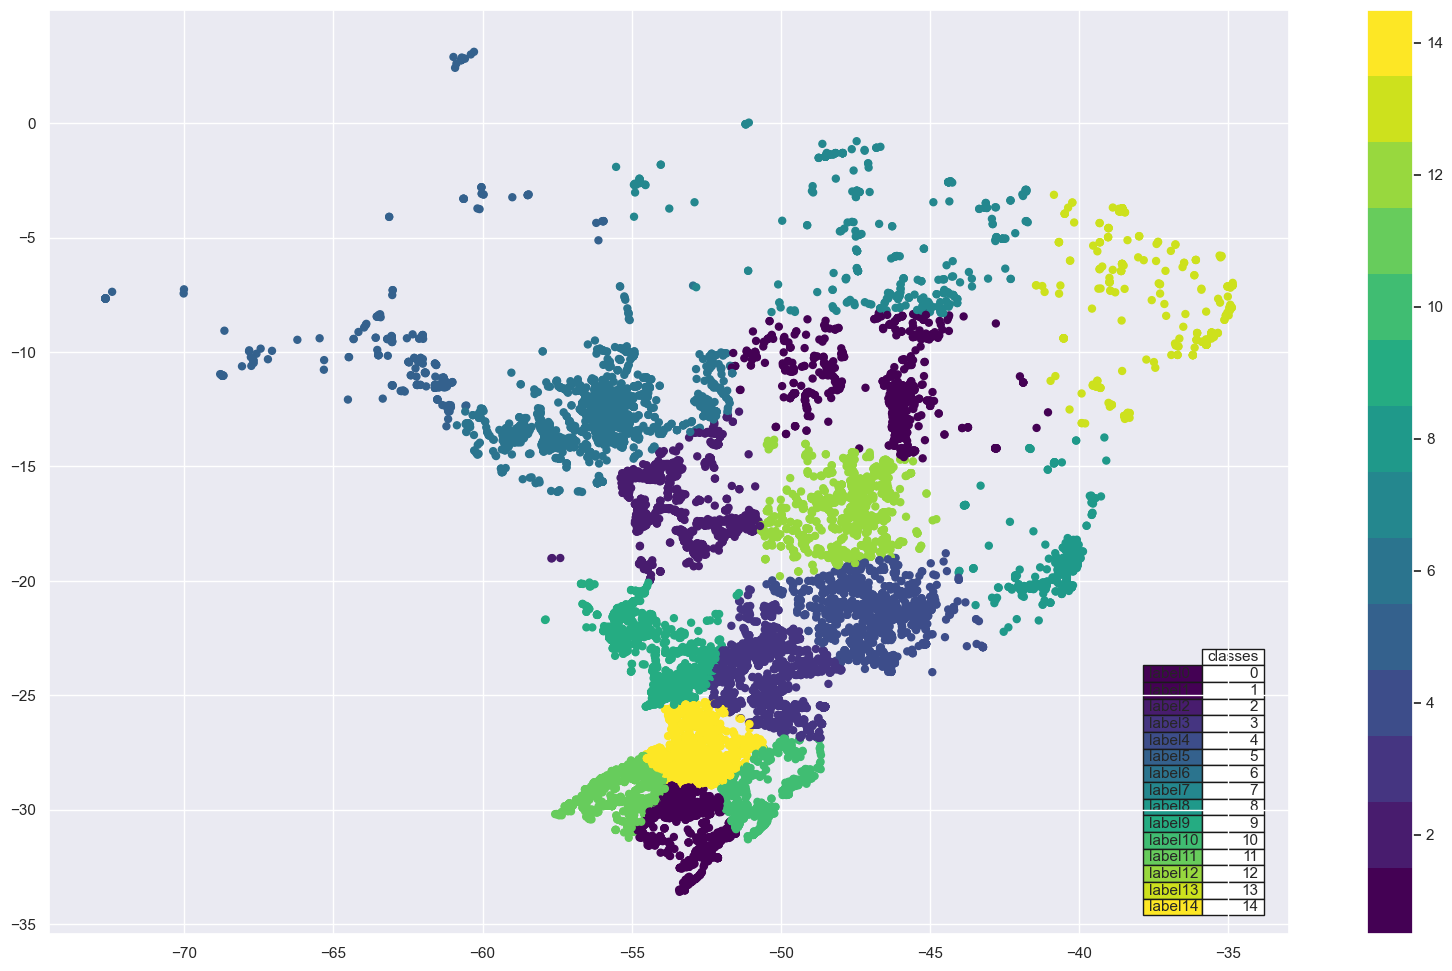

In [70]:
plt.subplots(sharey=True, figsize=(20,12))
plt.scatter(df1['Longitude'], df1['Latitude'], c=df1['cluster_label'], label=df1['cluster_label'], s=25, cmap=cmap, vmin=0.5, vmax=14.5)
plt.colorbar()
unique_classes = list(set(df1['cluster_label']))
plt.table(cellText=[[x] for x in unique_classes], loc='lower right',
          colWidths=[0.05],rowColours=cmap(np.array(unique_classes)-1),
         rowLabels=['label%d'%x for x in unique_classes],
          colLabels=['classes'])

## Map 3 - Plot points with colors and background UF Brasil

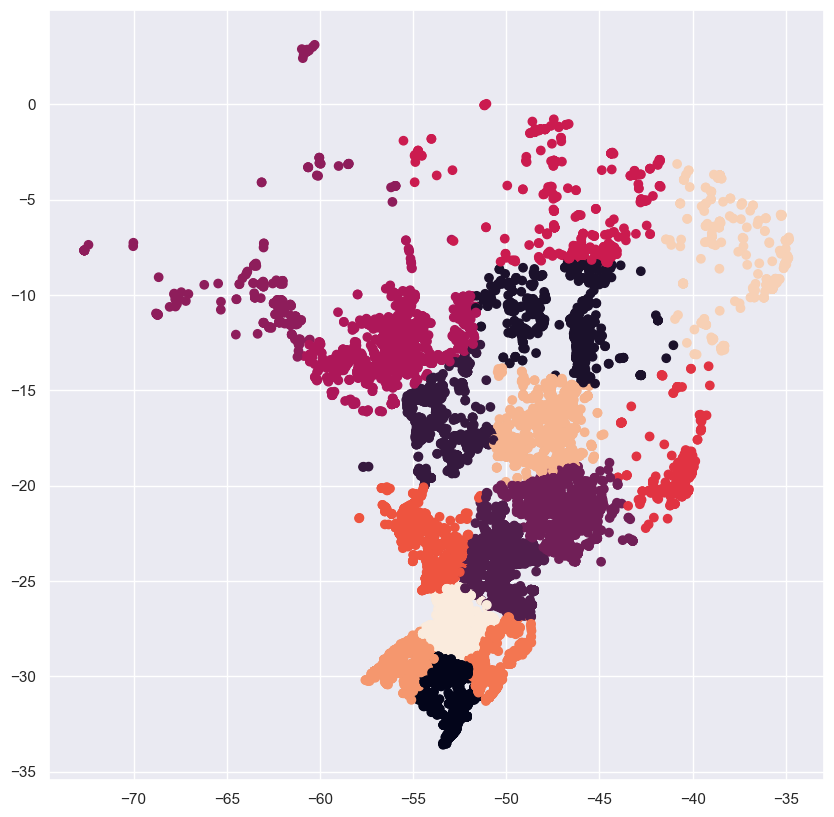

In [71]:
plt.subplots(sharey=True, figsize=(10,10))
plt.scatter(x=df1['Longitude'], y=df1['Latitude'], c=labels)
plt.show()

In [72]:
brasil_map = gpd.read_file(r'BR_UF_2022/BR_UF_2022.shp')

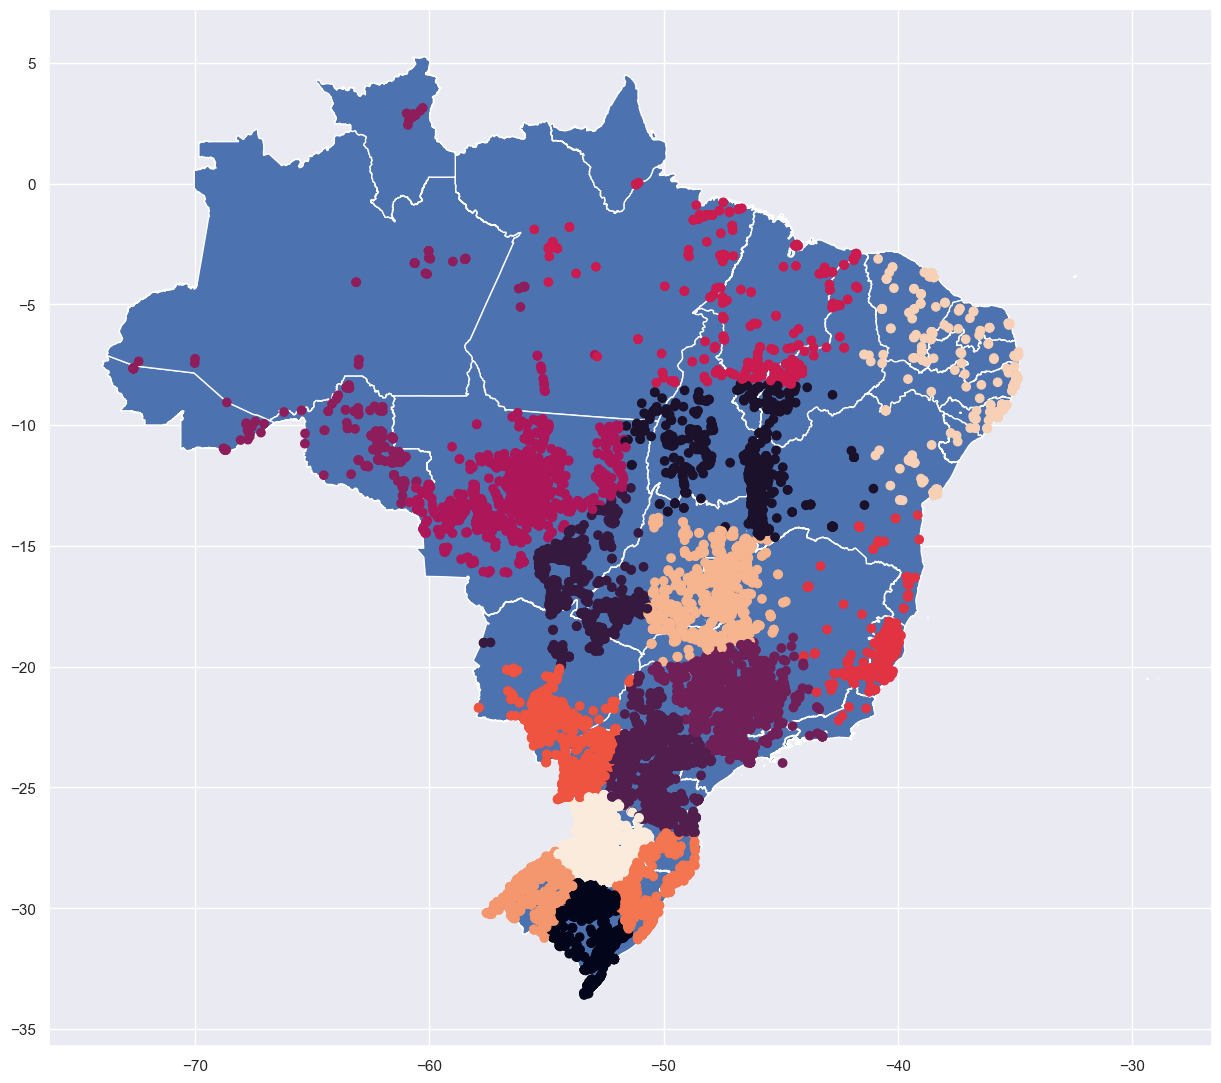

In [73]:
fig,ax = plt.subplots(figsize = (15,15))
brasil_map.plot(ax = ax)
plt.scatter(x=df1['Longitude'], y=df1['Latitude'], c=labels)
plt.show()

## Map 4 - Plot points using geometry - Option 1

In [74]:
geometry = [Point(xy) for xy in zip(df1['Longitude'], df1['Latitude'])]
geometry

[<POINT (-67.06 -9.946)>,
 <POINT (-68.761 -10.988)>,
 <POINT (-68.755 -10.996)>,
 <POINT (-68.755 -10.995)>,
 <POINT (-68.761 -10.988)>,
 <POINT (-68.799 -10.963)>,
 <POINT (-67.693 -10.369)>,
 <POINT (-67.769 -10.221)>,
 <POINT (-67.753 -10.604)>,
 <POINT (-72.422 -7.364)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-68.722 -11.037)>,
 <POINT (-68.69 -11.027)>,
 <POINT (-68.731 -11.033)>,
 <POINT (-68.742 -11.02)>,
 <POINT (-68.717 -11.038)>,
 <POINT (-68.69 -11.027)>,
 <POINT (-67.674 -10.474)>,
 <POINT (-67.197 -10.312)>,
 <POINT (-67.824 -9.922)>,
 <POINT (-67.83 -9.965)>,
 <POINT (-68.656 -9.064)>,
 <POINT (-67.683 -10.358)>,
 <POINT (-67.683 -10.358)>,
 <POINT (-67.441 -9.849)>,
 <POINT (-67.58

In [75]:
gdf = GeoDataFrame(df1, geometry=geometry)   
gdf

,Agente Armazenador,Latitude,Longitude,cluster_label,geometry
0,PESSOA FÍSICA,-9.945500,-67.060000,5,POINT (-67.06 -9.9455)
1,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,-10.988050,-68.761380,5,POINT (-68.76138 -10.98805)
2,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,-10.995830,-68.755270,5,POINT (-68.75527 -10.99583)
3,A.G.C. GUIMARÃES IMP. EXP.,-10.995220,-68.754620,5,POINT (-68.75462 -10.99522)
4,L. L. SILVA TRANSPORTADORA LTDA,-10.988120,-68.761100,5,POINT (-68.7611 -10.98812)
...,...,...,...,...,...
18074,AGROPECUARIA GUARANI LTDA,-12.792001,-49.085311,1,POINT (-49.08531 -12.792)
18075,AGROPECUARIA GUARANI LTDA,-12.792242,-49.085846,1,POINT (-49.08585 -12.79224)
18076,BONASA ALIMENTOS SA,-6.326620,-47.445910,7,POINT (-47.44591 -6.32662)
18077,BONASA ALIMENTOS SA,-6.326961,-47.445785,7,POINT (-47.44578 -6.32696)


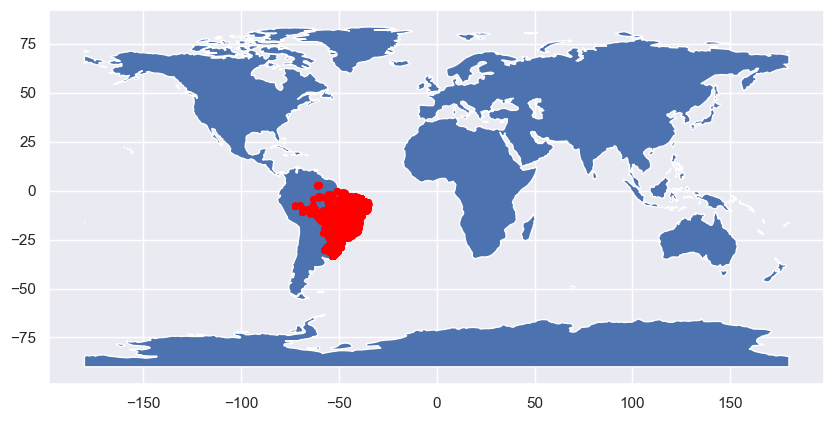

In [76]:
world = gpd.read_file(geodatasets.data.naturalearth.land['url'])
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);

## Map 5 - Plot points using geometry - Option 2

In [77]:
geometry1 = [Point(xy) for xy in zip(df1['Longitude'], df['Latitude'])]
geometry1

[<POINT (-67.06 -9.946)>,
 <POINT (-68.761 -10.988)>,
 <POINT (-68.755 -10.996)>,
 <POINT (-68.755 -10.995)>,
 <POINT (-68.761 -10.988)>,
 <POINT (-68.799 -10.963)>,
 <POINT (-67.693 -10.369)>,
 <POINT (-67.769 -10.221)>,
 <POINT (-67.753 -10.604)>,
 <POINT (-72.422 -7.364)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-72.647 -7.657)>,
 <POINT (-68.722 -11.037)>,
 <POINT (-68.69 -11.027)>,
 <POINT (-68.731 -11.033)>,
 <POINT (-68.742 -11.02)>,
 <POINT (-68.717 -11.038)>,
 <POINT (-68.69 -11.027)>,
 <POINT (-67.674 -10.474)>,
 <POINT (-67.197 -10.312)>,
 <POINT (-67.824 -9.922)>,
 <POINT (-67.83 -9.965)>,
 <POINT (-68.656 -9.064)>,
 <POINT (-67.683 -10.358)>,
 <POINT (-67.683 -10.358)>,
 <POINT (-67.441 -9.849)>,
 <POINT (-67.58

In [78]:
brasil_map = gpd.read_file(r'BR_UF_2022/BR_UF_2022.shp')

                          geometry
0           POINT (-67.06 -9.9455)
1      POINT (-68.76138 -10.98805)
2      POINT (-68.75527 -10.99583)
3      POINT (-68.75462 -10.99522)
4       POINT (-68.7611 -10.98812)
...                            ...
18074    POINT (-49.08531 -12.792)
18075  POINT (-49.08585 -12.79224)
18076   POINT (-47.44591 -6.32662)
18077   POINT (-47.44578 -6.32696)
18078   POINT (-48.35632 -8.97285)

[18079 rows x 1 columns]


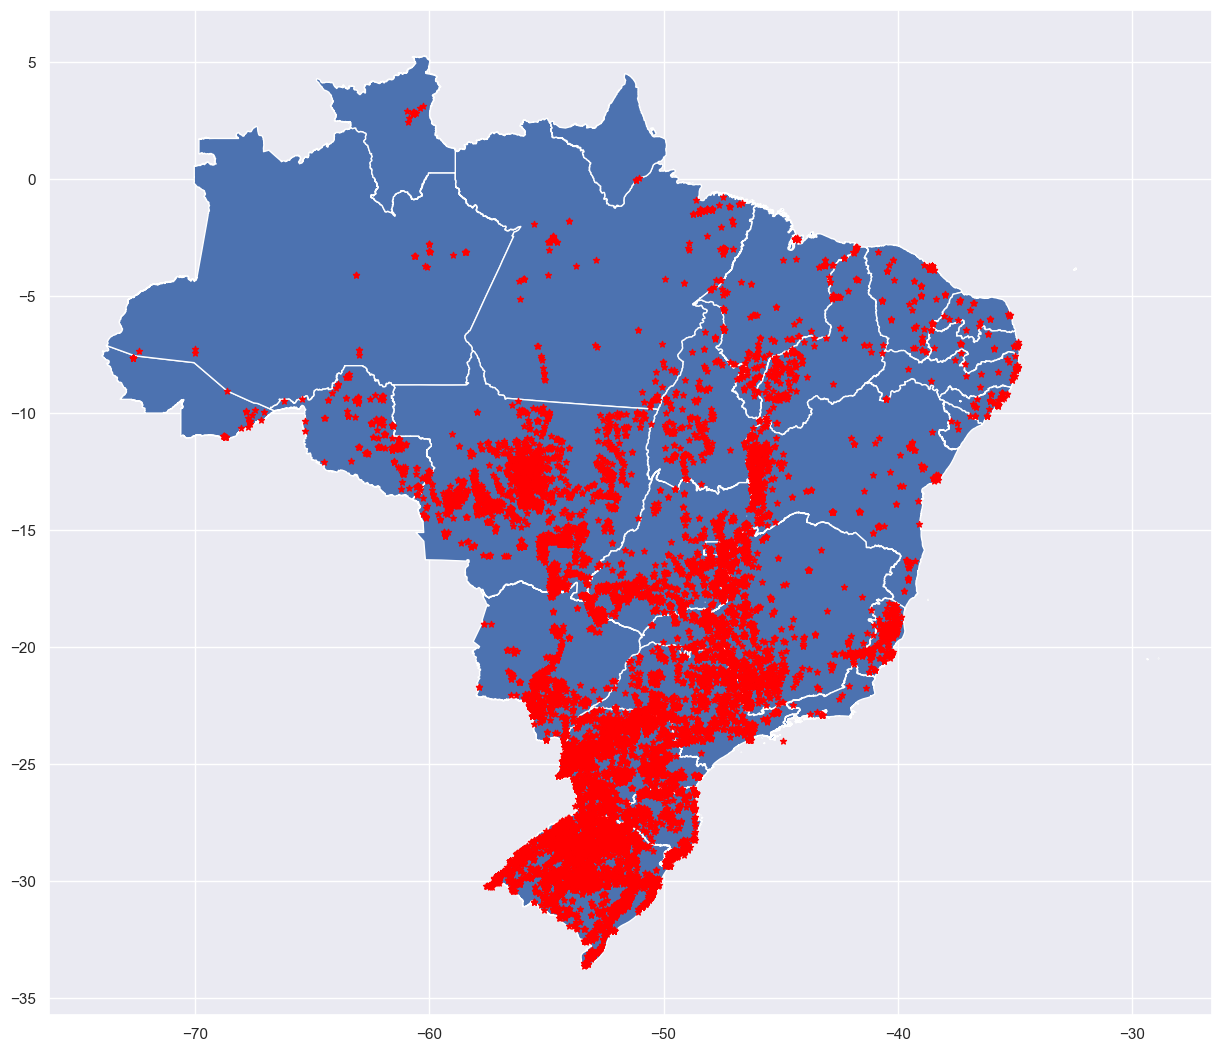

In [79]:
fig,ax = plt.subplots(figsize = (15,15))
brasil_map.plot(ax = ax)
geo_df = gpd.GeoDataFrame(geometry = geometry1)
print(geo_df)
g = geo_df.plot(ax = ax, markersize = 20, color = 'red',marker = '*',label = 'Delhi')
plt.show()

## Map 6 - Plot points using dynamic map -Zoom

In [80]:
fig = px.scatter_mapbox(df1, lat="Latitude", lon="Longitude", hover_name="Agente Armazenador", 
                        color_discrete_sequence=["fuchsia"], zoom=3, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [81]:
# https://stackoverflow.com/questions/66406003/clustering-geospatial-data-on-coordinates-and-non-spatial-feature

In [82]:
import numpy as np
from sklearn.metrics.pairwise import haversine_distances

# Clustering DBSCAN and Matrix

In [83]:
df2 = df.copy()
df2.head()

,Agente Armazenador,Latitude,Longitude
0,PESSOA FÍSICA,-9.94550,-67.06000
1,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,-10.98805,-68.76138
2,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,-10.99583,-68.75527
3,A.G.C. GUIMARÃES IMP. EXP.,-10.99522,-68.75462
4,L. L. SILVA TRANSPORTADORA LTDA,-10.98812,-68.76110


In [84]:
points_in_radians = df2[['Latitude','Longitude']].apply(np.radians).values
distances_in_km = haversine_distances(points_in_radians) * 6371
distances_in_km

array([[0.00000000e+00, 2.19197354e+02, 2.19088565e+02, ...,
        2.19562950e+03, 2.19563523e+03, 2.05404939e+03],
       [2.19197354e+02, 0.00000000e+00, 1.09233539e+00, ...,
        2.39883149e+03, 2.39883575e+03, 2.24532683e+03],
       [2.19088565e+02, 1.09233539e+00, 0.00000000e+00, ...,
        2.39833707e+03, 2.39834132e+03, 2.24472013e+03],
       ...,
       [2.19562950e+03, 2.39883149e+03, 2.39833707e+03, ...,
        0.00000000e+00, 4.03556787e-02, 3.10879540e+02],
       [2.19563523e+03, 2.39883575e+03, 2.39834132e+03, ...,
        4.03556787e-02, 0.00000000e+00, 3.10848085e+02],
       [2.05404939e+03, 2.24532683e+03, 2.24472013e+03, ...,
        3.10879540e+02, 3.10848085e+02, 0.00000000e+00]])

In [85]:
distances_in_km.shape

(18079, 18079)

In [86]:
clustering = DBSCAN(metric='precomputed', eps=1, min_samples=6)
clustering.fit(distances_in_km)

DBSCAN(eps=1, metric='precomputed', min_samples=6)

In [87]:
labels1 = clustering.labels_
labels1

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [88]:
df2['cluster_label'] = clustering.fit_predict(distances_in_km)

In [89]:
df2.groupby(['cluster_label'])['Agente Armazenador'].count()

cluster_label
-1      14179
 0         12
 1         19
 2          6
 3          9
        ...  
 382        8
 383        6
 384       10
 385        6
 386        6
Name: Agente Armazenador, Length: 388, dtype: int64

In [90]:
df2.head(10)

,Agente Armazenador,Latitude,Longitude,cluster_label
0,PESSOA FÍSICA,-9.94550,-67.06000,-1
1,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,-10.98805,-68.76138,-1
2,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,-10.99583,-68.75527,-1
3,A.G.C. GUIMARÃES IMP. EXP.,-10.99522,-68.75462,-1
4,L. L. SILVA TRANSPORTADORA LTDA,-10.98812,-68.76110,-1
5,ACREAVES ALIMENTOS LTDA,-10.96339,-68.79859,-1
6,PESSOA FÍSICA,-10.36930,-67.69338,-1
7,PESSOA FÍSICA,-10.22082,-67.76933,-1
8,AGROPECUÁRIA BURITI SA,-10.60357,-67.75298,-1
9,AMAZONIA AGROINDUSTRIA LTDA,-7.36420,-72.42240,-1


In [91]:
silhouette_score = metrics.silhouette_score(distances_in_km, labels1, metric='euclidean')
silhouette_score

-0.557249013407642

<Axes: xlabel='Longitude', ylabel='Latitude'>

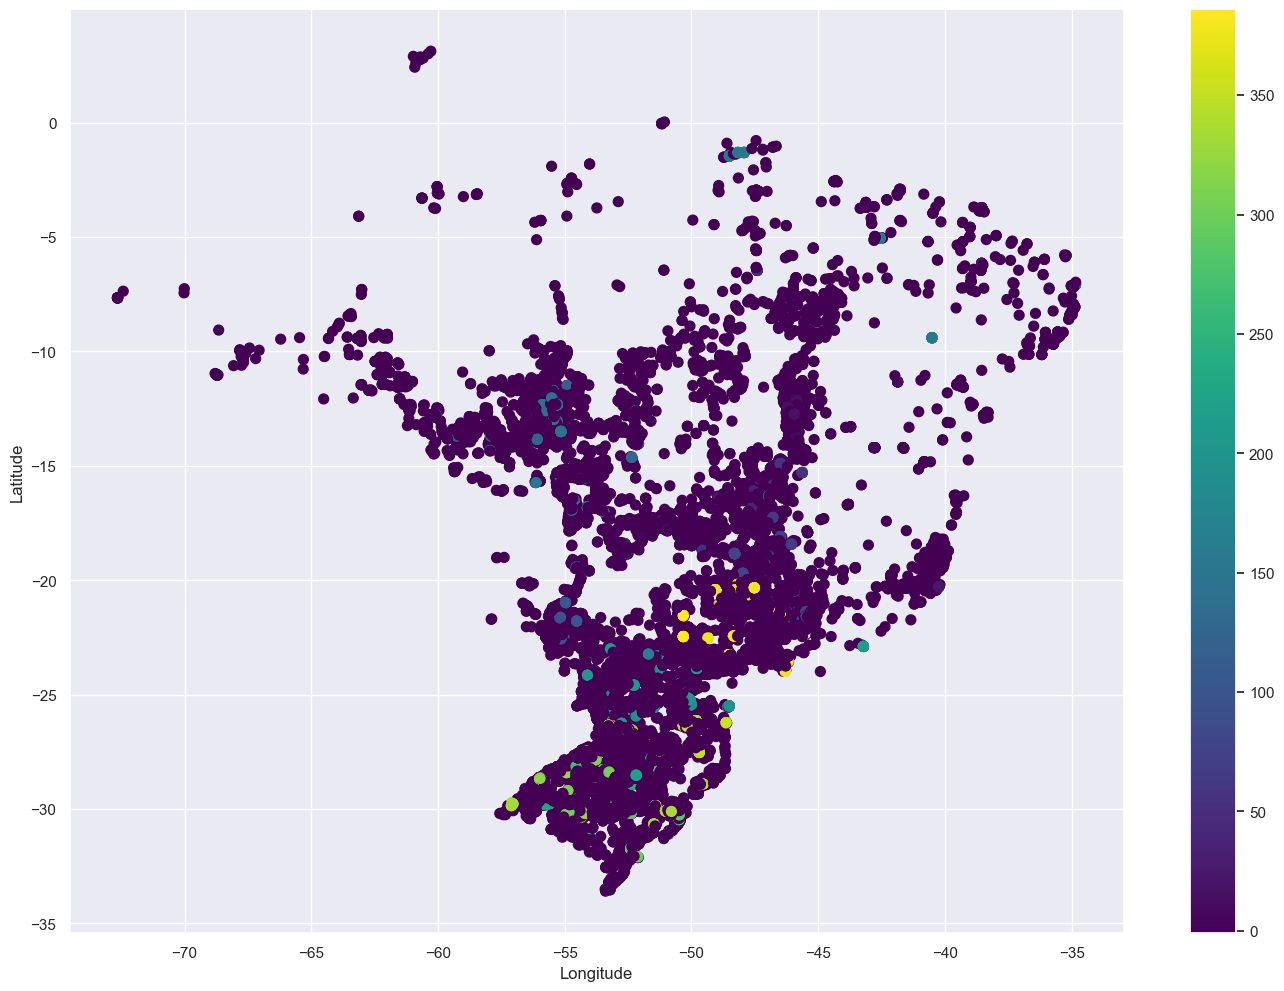

In [92]:
df2.plot.scatter(x = 'Longitude', y = 'Latitude', c=labels1, s=50, cmap='viridis', figsize=(17,12))

In [93]:
df2.head(10)

,Agente Armazenador,Latitude,Longitude,cluster_label
0,PESSOA FÍSICA,-9.94550,-67.06000,-1
1,RARO TRANSPORTES E COM. IMP. E EXP. LTDA,-10.98805,-68.76138,-1
2,ARMAZÉM SANTA FÉ IMP. E EXP. LTDA,-10.99583,-68.75527,-1
3,A.G.C. GUIMARÃES IMP. EXP.,-10.99522,-68.75462,-1
4,L. L. SILVA TRANSPORTADORA LTDA,-10.98812,-68.76110,-1
5,ACREAVES ALIMENTOS LTDA,-10.96339,-68.79859,-1
6,PESSOA FÍSICA,-10.36930,-67.69338,-1
7,PESSOA FÍSICA,-10.22082,-67.76933,-1
8,AGROPECUÁRIA BURITI SA,-10.60357,-67.75298,-1
9,AMAZONIA AGROINDUSTRIA LTDA,-7.36420,-72.42240,-1
